In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from io import StringIO
import io
from collections import namedtuple
from datetime import datetime,timedelta
import sys

   weekstart    weekend       Spend     Daily
0  01-Jan-18  07-Jan-18  34235.9220  4890.846
1  08-Jan-18  14-Jan-18  37359.6048  5337.086
2  15-Jan-18  21-Jan-18  38916.1164  5559.445
3  22-Jan-18  28-Jan-18  36903.8628  5271.980
Empty DataFrame
Columns: [Date, Amount]
Index: []
         Date    Amount
1  2018-01-01  4890.846
2  2018-01-02  4890.846
3  2018-01-03  4890.846
4  2018-01-04  4890.846
5  2018-01-05  4890.846
6  2018-01-06  4890.846
7  2018-01-07  4890.846
8  2018-01-08  5337.086
9  2018-01-09  5337.086
10 2018-01-10  5337.086
11 2018-01-11  5337.086
12 2018-01-12  5337.086
13 2018-01-13  5337.086
14 2018-01-14  5337.086
15 2018-01-15  5559.445
16 2018-01-16  5559.445
17 2018-01-17  5559.445
18 2018-01-18  5559.445
19 2018-01-19  5559.445
20 2018-01-20  5559.445
21 2018-01-21  5559.445
22 2018-01-22  5271.980
23 2018-01-23  5271.980
24 2018-01-24  5271.980
25 2018-01-25  5271.980
26 2018-01-26  5271.980
27 2018-01-27  5271.980
28 2018-01-28  5271.980


C:\Users\DNISHI~1\AppData\Local\Temp/ipykernel_16236/3259226528.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only
  df2.set_index(pd.Index(index),'index',inplace=True)


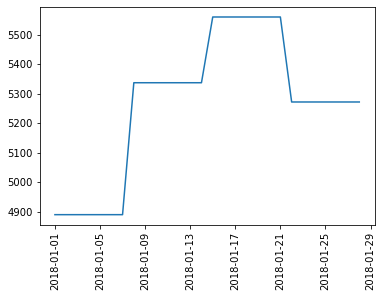

In [2]:
df = pd.DataFrame({
    'weekstart':['01-Jan-18','08-Jan-18','15-Jan-18','22-Jan-18'],
    'weekend':['07-Jan-18','14-Jan-18','21-Jan-18','28-Jan-18'],
    'Spend':[34235.922,37359.6048,38916.1164,36903.8628],
    'Daily':[4890.846,5337.086,5559.445,5271.98],
})
print(df)

df2=pd.DataFrame(columns=['Date','Amount'])
df2['Date']=pd.to_datetime(df2['Date'])
#df2.reset_index(level=0,inplace=True)
print(df2)

for key,value in df.iterrows():
    #print(key,value)
    amount=value['Daily']
    for date in pd.date_range(value['weekstart'], value['weekend']):
        #print(date)
        df2=df2.append({"Date":date,"Amount":amount},ignore_index=True)

index=range(1,len(df2)+1) 

df2.set_index(pd.Index(index),'index',inplace=True)
print(df2)

plt.plot(df2['Date'],df2['Amount'])
plt.xticks(rotation=90)
plt.show()

In [3]:
category = ['Car','Car','Car','Car','Truck','Truck','Truck']
name = ['Camry','Camry','Camry','Camry','Tacoma','Tundra','Tundra']
year = ['2007','2007','2008','2009','2010','2010','2011']
vals = [0.1,0.5,0.2,0.9,0.8,0.4,0.9]
df = pd.DataFrame({'Category': category,
                   'Name': name,
                   'Year': year,
                   'Vals': vals})

print(df.query("(Category=='Car' and Name=='Camry' and Year=='2007') or (Category=='Truck' and Name=='Tundra' and Year=='2010')"))

  Category    Name  Year  Vals
0      Car   Camry  2007   0.1
1      Car   Camry  2007   0.5
5    Truck  Tundra  2010   0.4


In [4]:
txt="firstname lastname (1937-2015)"
pattern=r'(\d{4}\-\d{4})+'

matches=re.findall(pattern,txt)
print(matches[0].split('-')[1])

2015


In [5]:
data = [['FRUIT', 'FRU', 100],['A.GRAPE','A.GRA', 50],['A.APPLE','A.APP', 50],
        ['VEGETABLE', 'VEG', 75],['A.TOMATO','A.TOM', 25],['A.CABBAGE','A.CAB', 25],['A.CARROT','A.CAR', 25]]
df = pd.DataFrame(data, columns = ['name', 'abbrevation', 'value'])

df['Category']=df['name'].apply(lambda x: x if x.isalpha() else None)
df.ffill(inplace=True)
print(df)

        name abbrevation  value   Category
0      FRUIT         FRU    100      FRUIT
1    A.GRAPE       A.GRA     50      FRUIT
2    A.APPLE       A.APP     50      FRUIT
3  VEGETABLE         VEG     75  VEGETABLE
4   A.TOMATO       A.TOM     25  VEGETABLE
5  A.CABBAGE       A.CAB     25  VEGETABLE
6   A.CARROT       A.CAR     25  VEGETABLE


In [6]:
print("find the floating point number")
txt="200.20356AVAX"
pattern=r"\d+\.*\d*"
print(re.findall(pattern,txt))

find the floating point number
['200.20356']


In [7]:
print("create a list of words and special characters")

txt="""var a = "hello world" 
print("hello", "a")"""


txt=re.sub('\n','',txt)        
results=[]
buffer=[]
for char in txt:
    if char.isalpha()==False:
        if char!=' ':
            results.append(char)
        if len(buffer)>0:
            results.append("".join(buffer))
        buffer.clear()
    else:
        buffer.append(char)
        
print(results)


create a list of words and special characters
['var', 'a', '=', '"', 'hello', '"', 'world', '(', 'print', '"', '"', 'hello', ',', '"', '"', 'a', ')']


In [8]:
print("convert to the year and quarter")
data='''yrmo
202101
202102
202103
202104
202105
202106
202109
202111'''
df = pd.read_csv(io.StringIO(data), sep=' \s+', engine='python')
month_year=pd.to_datetime(df['yrmo'],format="%Y%m")
df['DIST_PERIOD'] = month_year.dt.to_period("Q").dt.strftime('%Y0%q')
print(df)

convert to the year and quarter
     yrmo DIST_PERIOD
0  202101      202101
1  202102      202101
2  202103      202101
3  202104      202102
4  202105      202102
5  202106      202102
6  202109      202103
7  202111      202104


In [9]:
print("find words with no space following or a single space between words")
list_of_strings = ["apple", "orange ca", "pear  sa", "banana    sth"]

my_list=[]
def find_phrase(list_of_strings):
    for string in list_of_strings:
        matches=re.findall(r"(\w+)( \w+)*", string)
        if len(matches)>0:
            my_list.append("".join([matches[0][0],matches[0][1]]))
    return my_list
            
print(find_phrase(list_of_strings))

find words with no space following or a single space between words
['apple', 'orange ca', 'pear', 'banana']


In [10]:
txt="a b c private d e f g protected h i j k public l m n o p"

pattern=r"(public)|(private)|(protected)"

matches=re.findall(pattern,txt)
for match in matches:
    print(match)

('', 'private', '')
('', '', 'protected')
('public', '', '')


In [11]:
print("Look behind for the phrase MFG:")
print("look behind is not including in the grouping output")
txt="MFG: acme, something else, MFG: initech"
pattern=r"(?<=MFG\:)\s+\w+"
matches=re.findall(pattern,txt)
for match in matches:
    print(match)

Look behind for the phrase MFG:
look behind is not including in the grouping output
 acme
 initech


In [12]:
print("words without the character e")
strs = ['america','e', 'E', 'world','hello','welcome','board','know']
pattern="(?:(?!e)[a-z])+"
for item in strs:
    print(item,re.search(pattern,item))


words without the character e
america <re.Match object; span=(0, 2), match='am'>
e None
E None
world <re.Match object; span=(0, 5), match='world'>
hello <re.Match object; span=(0, 1), match='h'>
welcome <re.Match object; span=(0, 1), match='w'>
board <re.Match object; span=(0, 5), match='board'>
know <re.Match object; span=(0, 4), match='know'>


In [13]:
data="""user_id,cat_id,prod_id,score,pref_prod
    29762,9,3115,1.000000,335.0
    29762,58,1335,1.000000,335.0
    234894,58,1335,1.000000,335.0
    413276,43,1388,1.000000,335.0
    413276,58,335,1.000000,335.0
    413276,73,26,1.000000,335.0
    9280593,9,137,1.000000,335.0
    9280593,58,1335,1.000000,335.0
    9280593,74,160,1.000000,335.0
    4554542,66,1612,0.166667,197.0
    4554542,66,1406,0.166767,197.0
    4554542,66,2021,1.000000,197.0"""

df = pd.read_csv(io.StringIO(data), sep=',')
print(df)


Record=namedtuple('Generic',['user_id','cat_id','prod_id','score','pref_prod'])

def map_to_record(row):
    return Record(row.user_id, row.cat_id, row.prod_id,row.score,row.pref_prod)

my_list = list(map(map_to_record, df.itertuples()))

def named_tuple_to_json(named_tuple):
    """
    convert a named tuple to a json tree structure
    """
    json_string="records:["
    for record in named_tuple:
        json_string+="{"
        json_string+="'user_id': {},'cat_id': {},'prod_id': {},'score': {},'pref_prod': {},".format(
        record.user_id,record.cat_id,record.prod_id,record.score,record.pref_prod)
        json_string+="},"
    json_string+="]"
    return json_string

# convert the list of named tuples to a json tree structure
json_tree = named_tuple_to_json(my_list)
print(json_tree)

    user_id  cat_id  prod_id     score  pref_prod
0     29762       9     3115  1.000000      335.0
1     29762      58     1335  1.000000      335.0
2    234894      58     1335  1.000000      335.0
3    413276      43     1388  1.000000      335.0
4    413276      58      335  1.000000      335.0
5    413276      73       26  1.000000      335.0
6   9280593       9      137  1.000000      335.0
7   9280593      58     1335  1.000000      335.0
8   9280593      74      160  1.000000      335.0
9   4554542      66     1612  0.166667      197.0
10  4554542      66     1406  0.166767      197.0
11  4554542      66     2021  1.000000      197.0
records:[{'user_id': 29762,'cat_id': 9,'prod_id': 3115,'score': 1.0,'pref_prod': 335.0,},{'user_id': 29762,'cat_id': 58,'prod_id': 1335,'score': 1.0,'pref_prod': 335.0,},{'user_id': 234894,'cat_id': 58,'prod_id': 1335,'score': 1.0,'pref_prod': 335.0,},{'user_id': 413276,'cat_id': 43,'prod_id': 1388,'score': 1.0,'pref_prod': 335.0,},{'user_id': 4132

In [14]:
#1;SMITH, JOHN;10/20/20 8:00 AM;10/20/20 9:30 AM
#2;SMITH, JOHN;10/20/20 9:20 AM;10/20/20 10:30 AM
#3;SMITH, JOHN;10/20/20 10:20 AM;10/20/20 11:00 AM
#4;COOPER, ALLEN;10/20/20 1:00 PM;10/20/20 2:15 PM
#5;PEREZ, HILL;10/20/20 3:15 PM;10/20/20 4:00 PM
#6;SMITH, JOHN;10/4/21 8:00 AM;10/20/21 9:30 AM
#7;SMITH, JOHN;10/4/21 9:20 AM;10/20/21 10:30 AM
#8;SMITH, JOHN;10/4/21 11:20 AM;10/20/21 12:00 PM
#9;SMITH, JOHN ;10/4/21 1:00 PM;10/20/21 2:15 PM
#10;SMITH, JOHN;10/4/21 3:15 PM;10/20/21 4:00 PM

df = pd.read_csv(io.StringIO("""
Record ID;Record Name;Record Start;Record End
1;SMITH, JOHN;10/20/20 8:00 AM;10/20/20 9:30 AM
2;SMITH, JOHN;10/20/20 9:20 AM;10/20/20 10:30 AM
3;SMITH, JOHN;10/20/20 10:20 AM;10/20/20 11:00 AM
4;COOPER, ALLEN;10/20/20 1:00 PM;10/20/20 2:15 PM
5;PEREZ, HILL;10/20/20 3:15 PM;10/20/20 4:00 PM
6;SMITH, JOHN;10/4/21 8:00 AM;10/20/21 9:30 AM
7;SMITH, JOHN;10/4/21 9:20 AM;10/20/21 10:30 AM
8;SMITH, JOHN;10/4/21 11:20 AM;10/20/21 12:00 PM
9;SMITH, JOHN ;10/4/21 1:00 PM;10/20/21 2:15 PM
10;SMITH, JOHN;10/4/21 3:15 PM;10/20/21 4:00 PM
"""),sep=';')

df['Record Start']=pd.to_datetime(df['Record Start'])
df['Record End']=pd.to_datetime(df['Record End'])

def create_datetime(date,hour,minute,second):
    month=date.month
    day=date.day
    year=date.year
    #month = int(txt.split("/")[0])
    #day = int(txt.split("/")[1])
    #year = int("20"+txt.split("/")[2].split(" ")[0])
    # datetime(year, month, day, hour, minute, second, microsecond)
    return datetime(year=year,month=month,day=day,hour=hour,minute=minute,second=second,microsecond=0)

def get_minutes(row):
    #start = datetime.strptime(row['Record Start'], '%m/%d/%y %H:%M %p')
    start=row['Record Start']
    start_end_of_day=create_datetime(row['Record Start'],23,59,59)
   
    #end = datetime.strptime(row['Record End'], '%m/%d/%y %H:%M %p')
    end = row['Record End']
    end_beginning_of_day=create_datetime(row['Record End'], 0,0,0)
    
    results=[start + timedelta(minutes=x) for x in range(0, round((end-start).total_seconds()//60)+1)]
      
    #for item in results:
    #    print(item)
    #sys.exit()
    return results

df['minutes'] = df.apply(get_minutes, axis=1)

def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

prev_row=None
for index,row in df.iterrows():
    if index==0:
        df.loc[index,'Count']=1
    else:
        prev_row=df.iloc[index-1]
        
    if not prev_row is None:
        if prev_row['Record Name']==row['Record Name']:
            count=prev_row['Count']
            lst1=row['minutes']
            lst2=prev_row['minutes']
            if len(intersection(lst1,lst2))>0:
                df.loc[index,'Count']=count+1
            else:
                df.loc[index,'Count']=1
        else:
            df.loc[index,'Count']=1
        
#print(df[df['Count']>=3])   
print(df[['Record ID','Record Name', 'Record Start','Record End','Count']])
        


   Record ID    Record Name        Record Start          Record End  Count
0          1    SMITH, JOHN 2020-10-20 08:00:00 2020-10-20 09:30:00    1.0
1          2    SMITH, JOHN 2020-10-20 09:20:00 2020-10-20 10:30:00    2.0
2          3    SMITH, JOHN 2020-10-20 10:20:00 2020-10-20 11:00:00    3.0
3          4  COOPER, ALLEN 2020-10-20 13:00:00 2020-10-20 14:15:00    1.0
4          5    PEREZ, HILL 2020-10-20 15:15:00 2020-10-20 16:00:00    1.0
5          6    SMITH, JOHN 2021-10-04 08:00:00 2021-10-20 09:30:00    1.0
6          7    SMITH, JOHN 2021-10-04 09:20:00 2021-10-20 10:30:00    2.0
7          8    SMITH, JOHN 2021-10-04 11:20:00 2021-10-20 12:00:00    3.0
8          9   SMITH, JOHN  2021-10-04 13:00:00 2021-10-20 14:15:00    1.0
9         10    SMITH, JOHN 2021-10-04 15:15:00 2021-10-20 16:00:00    1.0


In [15]:
pattern=r'(\d{1,2})\/(\d{1,2})\/(\d{4}).*?'

txt="10/4/21 8:00 AM"
month = txt.split("/")[0]
day = txt.split("/")[1]
year = txt.split("/")[2].split(" ")[0]
print(month,day,year)


10 4 21


In [16]:
txt="""id     value
a1     0:0,1:10,2:0,3:0,4:7
b4     0:5,1:0,2:0,3:0,4:1
c5     0:0,1:3,2:2,3:0,4:0
k2     0:0,1:2,2:0,3:4,4:0 """

df = pd.DataFrame({"id":["a1", "b4", "c5", "k2"], 
                   "value":["0:0,1:10,2:0,3:0,4:7","0:5,1:0,2:0,3:0,4:1","0:0,1:3,2:2,3:0,4:0","0:0,1:2,2:0,3:4,4:0"]})

#print(df)


for key,row in df.iterrows():
    results=[]
    {results.append({int(k),int(v)}) if int(k)!=0 and int(v)!=0 else None for k,v in (x.split(':') for x in row['value'].split(','))}
    print(results)
    df.loc[key,'value']=results
    
print(df)

[{1, 10}, {4, 7}]
[{1, 4}]
[{1, 3}, {2}]
[{1, 2}, {3, 4}]
   id              value
0  a1  [{1, 10}, {4, 7}]
1  b4           [{1, 4}]
2  c5      [{1, 3}, {2}]
3  k2   [{1, 2}, {3, 4}]


   VIXCLS  Percent_Change   Cumulative                                 2item
0   17.24        0.000000  1000.000000  AxesSubplot(0.125,0.125;0.775x0.755)
1   18.19        0.055104  1055.104408  AxesSubplot(0.125,0.125;0.775x0.755)
2   19.22        0.056625  1114.849188  AxesSubplot(0.125,0.125;0.775x0.755)
3   20.11        0.046306  1166.473318  AxesSubplot(0.125,0.125;0.775x0.755)
4   20.26        0.007459  1175.174014  AxesSubplot(0.125,0.125;0.775x0.755)
5   22.20        0.095755  1287.703016  AxesSubplot(0.125,0.125;0.775x0.755)
6   22.44        0.010811  1301.624130  AxesSubplot(0.125,0.125;0.775x0.755)
7   20.05       -0.106506  1162.993039  AxesSubplot(0.125,0.125;0.775x0.755)


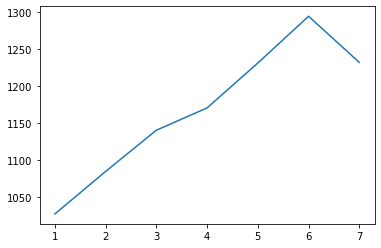

In [17]:
data=[17.24,18.19,19.22,20.11,20.26,22.2,22.44,20.05]
df=pd.DataFrame({'VIXCLS':data})
df['Percent_Change']=df['VIXCLS'].pct_change().fillna(0)

amount=1000

returns_plus_one=df['Percent_Change']+1
cumulative_return = returns_plus_one.cumprod()

df['Cumulative']=cumulative_return.mul(amount)

df['2item']=df['Cumulative'].rolling(window=2).mean().plot()

print(df)

Index(['1-01', '1-02', '1-03', '1-04', '1-05', '1-06', '1-07', '1-08', '1-09',
       '1-10', '1-11', '1-12', '2-01', '2-02', '2-03', '2-04', '2-05', '2-06',
       '2-07', '2-08', '2-09', '2-10', '2-11', '2-12', '3-01', '3-02', '3-03',
       '3-04', '3-05', '3-06', '3-07', '3-08', '3-09', '3-10', '3-11', '3-12'],
      dtype='object', name='Month')


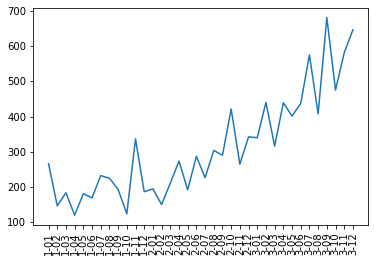

In [18]:
df=pd.read_csv('shampoo.csv',parse_dates=['Month'])
#print(df.columns)
pivot=df.pivot_table(index=['Month'],values=['Sales'],aggfunc=np.sum)
print(pivot.index)
plt.plot(pivot.index,pivot.values)
plt.xticks(rotation=90)
plt.show()

In [19]:
data = {'id': [2, 2, 2, 4, 4], 'time': ['22:17:46', '22:19:02', '22:06:00', '22:18:06', '22:18:06']}
df=pd.DataFrame.from_dict(data)

df['time'] = pd.to_datetime(df['time'])
df['time_diff'] = df.groupby('id')['time'].transform(lambda x: x.max() - x.min())

#grouped=df.groupby('id')['time'].agg(['min', 'max'])
#for item in grouped.items():
#    print(item['min'],item['max'])

print(df)

   id                time       time_diff
0   2 2021-11-20 22:17:46 0 days 00:13:02
1   2 2021-11-20 22:19:02 0 days 00:13:02
2   2 2021-11-20 22:06:00 0 days 00:13:02
3   4 2021-11-20 22:18:06 0 days 00:00:00
4   4 2021-11-20 22:18:06 0 days 00:00:00


In [20]:
print('include only rows landing on wednesday ')

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

indices = pd.date_range(start='feb 01 2020', end='nov 30 2020', freq='D')
sr=pd.Series(index=indices, data=np.random.randn(indices.shape[0]))
print(sr[sr.index.dayofweek == 2])

include only rows landing on wednesday 
2020-02-05    1.164147
2020-02-12   -0.872873
2020-02-19   -0.572917
2020-02-26    0.936244
2020-03-04    0.890783
2020-03-11   -0.911510
2020-03-18   -0.519189
2020-03-25   -0.392932
2020-04-01    1.256400
2020-04-08   -0.995776
2020-04-15    0.480521
2020-04-22    2.532899
2020-04-29    0.777943
2020-05-06   -0.079824
2020-05-13    0.284184
2020-05-20    0.684372
2020-05-27   -2.227408
2020-06-03   -1.175986
2020-06-10    0.014088
2020-06-17    0.397393
2020-06-24   -0.812656
2020-07-01   -1.120630
2020-07-08    0.098621
2020-07-15   -0.824770
2020-07-22   -0.638800
2020-07-29    0.411657
2020-08-05   -0.540858
2020-08-12   -0.318984
2020-08-19   -0.476933
2020-08-26    2.349569
2020-09-02    1.358365
2020-09-09   -1.291633
2020-09-16    1.594093
2020-09-23   -0.274841
2020-09-30    2.289768
2020-10-07    0.529003
2020-10-14    0.889906
2020-10-21    0.465075
2020-10-28   -0.197626
2020-11-04    1.404271
2020-11-11    1.242519
2020-11-18    0.0

In [21]:
txt="""scanned_date,total       
2021-11-01,0
2021-11-02,0
2021-11-03,0
2021-11-04,0
2021-11-05,0
"""

#https://www.py4u.net/discuss/17020

df = pd.read_csv(io.StringIO(txt),sep=',',parse_dates=['scanned_date'])
print(list(map(lambda tuple_obj: 
               (
                   pd.to_datetime(tuple_obj[1],'%M/%d/%Y')
                  #str(tuple_obj[1].astype("datetime64[M]").astype(int)% 12 + 1)
                  # + "\\" + str(tuple_obj[1].astype(object).day)
                  # + "\\" + str(tuple_obj[1].astype("datetime64[Y]"))
                 ,
                tuple_obj[2]),
               df.to_records())))

[(Timestamp('2021-11-01 00:00:00'), 0), (Timestamp('2021-11-02 00:00:00'), 0), (Timestamp('2021-11-03 00:00:00'), 0), (Timestamp('2021-11-04 00:00:00'), 0), (Timestamp('2021-11-05 00:00:00'), 0)]


In [22]:
txt=""" ColA,ColB,ColC,ColD
B,2021-10-24,2,NA
B,2021-10-25,4,2
B,2021-10-26,500,496
B,2021-10-27,100,-400
B,2021-10-28,55,-45
B,2021-10-29,600,545
B,2021-10-30,8,-592 
B,2021-10-31,4300,4292 
B,2021-11-01,200,-4100
H,2021-10-24,600,NA
H,2021-10-25,0000,9400 
H,2021-10-26,100,-9900 
H,2021-10-27,300,200
H,2021-10-28,2,-292
H,2021-10-29,8,6
H,2021-10-30,600,592
H,2021-10-31,600,0
H,2021-11-01,650,50"""

df = pd.read_csv(io.StringIO(txt),sep=',',parse_dates=['ColB'])
df['ColD_2']=df['ColD'].shift(2)
df['ColD_3']=df['ColD'].shift(3)
df['ColD_2_check']=np.where(df['ColD_2']>200,1,0)
df['ColD_3_check']=np.where(df['ColD_3']>200,1,0)
df['newCol']=df['ColD_2_check']|df['ColD_3_check']
df.drop(['ColD_2','ColD_3','ColD_2_check','ColD_3_check'],inplace=True,axis=1)
print(df)

    ColA       ColB  ColC    ColD  newCol
0      B 2021-10-24     2     NaN       0
1      B 2021-10-25     4     2.0       0
2      B 2021-10-26   500   496.0       0
3      B 2021-10-27   100  -400.0       0
4      B 2021-10-28    55   -45.0       1
5      B 2021-10-29   600   545.0       1
6      B 2021-10-30     8  -592.0       0
7      B 2021-10-31  4300  4292.0       1
8      B 2021-11-01   200 -4100.0       1
9      H 2021-10-24   600     NaN       1
10     H 2021-10-25     0  9400.0       1
11     H 2021-10-26   100 -9900.0       0
12     H 2021-10-27   300   200.0       1
13     H 2021-10-28     2  -292.0       1
14     H 2021-10-29     8     6.0       0
15     H 2021-10-30   600   592.0       0
16     H 2021-10-31   600     0.0       0
17     H 2021-11-01   650    50.0       1


In [23]:
print("annualized return rate")
data=[ 3, 7, 5, 12, 1]

def annualize_rate(data):
    retVal=0
    accum=1
    for item in data:
        print(1+(item/100))
        accum*=1+(item/100)
        retVal=pow(accum,1/len(data))-1
    return retVal
    
print(annualize_rate(data))

data=[0.133335,0.148724]

print(annualize_rate(data))


data=[0.079676,0.123110]
print(annualize_rate(data))

annualized return rate
1.03
1.07
1.05
1.12
1.01
0.05533402290765199
1.00133335
1.00148724
0.001410292043902306
1.00079676
1.0012311
0.0010139064424810051


   Annualized  Percent_Change  Cumulative  \
0    0.035719        0.000000    1.000000   
1    0.031417       -0.120440    0.879560   
2    0.030872       -0.017347    0.864302   
3    0.029147       -0.055876    0.816008   

                                  2item  
0  AxesSubplot(0.125,0.125;0.775x0.755)  
1  AxesSubplot(0.125,0.125;0.775x0.755)  
2  AxesSubplot(0.125,0.125;0.775x0.755)  
3  AxesSubplot(0.125,0.125;0.775x0.755)  


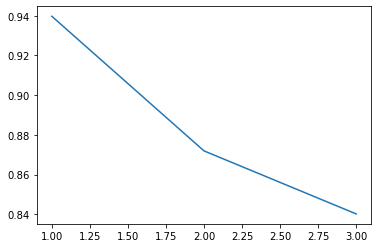

In [24]:
data=[0.035719,0.031417,0.030872,0.029147]
df=pd.DataFrame({'Annualized':data})
df['Percent_Change']=df['Annualized'].pct_change().fillna(0)

amount=1

returns_plus_one=df['Percent_Change']+1
cumulative_return = returns_plus_one.cumprod()

df['Cumulative']=cumulative_return.mul(amount)

df['2item']=df['Cumulative'].rolling(window=2).mean().plot()

print(df)

In [25]:
(0.035719+0.031417+0.030872+0.029147)/4

0.03178875

In [32]:
txt="""Player,Position,Score
Darrel Williams,RB,24.9
Mark Ingram,RB,18.8
Michael Carter,RB,16.2
Najee Harris,RB,15.3
Buffalo Bills,DEF,12
Davante Adams,WR,11.3
Aaron Rodgers,QB,10.48
Tyler Bass,K,9
Corey Davis,WR,8.8
T.J. Hockenson,TE,0"""

df = pd.read_csv(io.StringIO(txt),sep=',')
requirements_dictionary = {'QB': 1, 'RB': 2, 'WR': 2, 'TE': 1, 'K': 1, 'DEF': 1, 'FLEX': 2}
#print(df)
df_top_rows = pd.DataFrame()
for position in requirements_dictionary.keys():
    df_top_rows = df_top_rows.append(df[df['Position'] == position].sort_values(by='Score', ascending=False).head(requirements_dictionary[position]))
#print(df_top_rows)


position='FLEX'
df_flex_rows = df_top_rows.append(df[df['Position'].isin(['RB','WR','TE'])].sort_values(by='Score', ascending=False).head(requirements_dictionary[position]))

#print(df_flex_rows)
df_result=pd.concat([df_top_rows,df_flex_rows],axis=0)
df_result.drop_duplicates(inplace=True)
print(df_result)

            Player Position  Score
6    Aaron Rodgers       QB  10.48
0  Darrel Williams       RB  24.90
1      Mark Ingram       RB  18.80
5    Davante Adams       WR  11.30
8      Corey Davis       WR   8.80
9   T.J. Hockenson       TE   0.00
7       Tyler Bass        K   9.00
4    Buffalo Bills      DEF  12.00


In [2]:
txt="""
column_1
1,2,3
2,3,4
"""
df=pd.read_csv(io.StringIO(txt),sep='\n')
df[['column_2','column_3','column_4']]=df['column_1'].str.split(',',expand=True)
print(df)

  column_1 column_2 column_3 column_4
0    1,2,3        1        2        3
1    2,3,4        2        3        4


C:\Users\DNISHI~1\AppData\Local\Temp/ipykernel_16728/3643915104.py:39: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(xy=[x2,y2],s=str(y2))


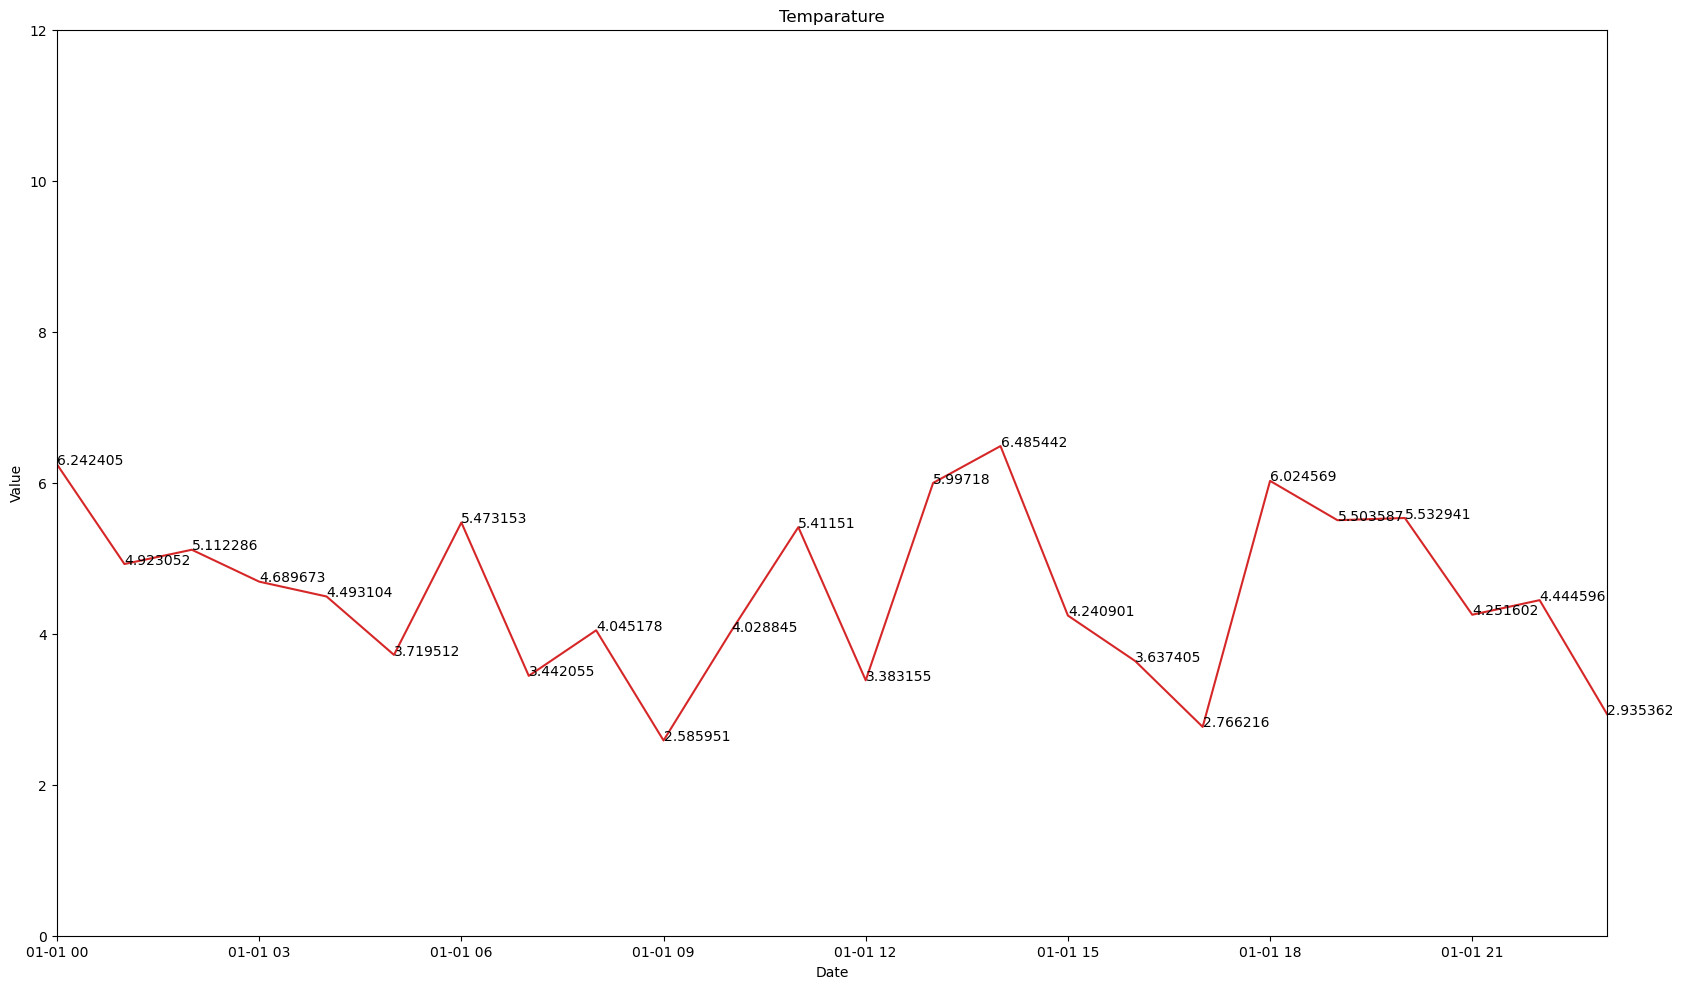

In [68]:
data="""Date,Ta
2020-01-01 00:00:00,6.242405
2020-01-01 01:00:00,4.923052
2020-01-01 02:00:00,5.112286
2020-01-01 03:00:00,4.689673
2020-01-01 04:00:00,4.493104
2020-01-01 05:00:00,3.719512
2020-01-01 06:00:00,5.473153
2020-01-01 07:00:00,3.442055
2020-01-01 08:00:00,4.045178
2020-01-01 09:00:00,2.585951
2020-01-01 10:00:00,4.028845
2020-01-01 11:00:00,5.411510
2020-01-01 12:00:00,3.383155
2020-01-01 13:00:00,5.997180
2020-01-01 14:00:00,6.485442
2020-01-01 15:00:00,4.240901
2020-01-01 16:00:00,3.637405
2020-01-01 17:00:00,2.766216
2020-01-01 18:00:00,6.024569
2020-01-01 19:00:00,5.503587
2020-01-01 20:00:00,5.532941
2020-01-01 21:00:00,4.251602
2020-01-01 22:00:00,4.444596
2020-01-01 23:00:00,2.935362
"""
#df['Ta'].plot(figsize=(20,12),legend=True,subplots=True,ylim=(0,12),
#              xticks=list(df.index.values),fontsize=10,grid=True,
#              rot=0, xlim=(pd.Timestamp('2020-01-01 00:00:00'),pd.Timestamp('2020-01-01 23:00:00')))

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    fig,ax=plt.subplots(figsize=(20,12), dpi=dpi)
    ax.plot(x, y, color='tab:red')
    #plt.xticks(rotation=90)
    items=range(0,len(df))
    for index in items:
        y2=y[index]
        x2=x[index]
        ax.annotate(xy=[x2,y2],s=str(y2))
    plt.xlim([pd.Timestamp('2020-01-01 00:00:00'),pd.Timestamp('2020-01-01 23:00:00')])        
    plt.ylim(0,12)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

df = pd.read_csv(StringIO(data), sep=',', index_col=0,parse_dates=['Date'])
plot_df(df, x=df.index, y=df.Ta, title='Temparature')



In [221]:
df4 = pd.DataFrame({'a':['red','green','yellow','blue'],'b':[1,5,6,7],'c':[1,7,8,9]})
df5 = pd.DataFrame({'a':'red','b':44, 'c':55}, index=[0])
#print(df4)
#print(df5)
#print(pd.concat([df5, df4]).drop_duplicates(['a'], keep='first'))

df3 = pd.merge(df4, df5, how='left', on='a')
print(df3)

df3['b']=df3['b_x']
df3['c']=df3['c_x']

print(df3)

filter=~df3[['b_y','c_y']].isnull()
print(filter)


df3['b']=map(lambda x: x['b_y'],df[filter])

#df3['b'] = df3[filter].apply(lambda x: x['b_y'],axis=1)
#df3['c'] = df3[filter].apply(lambda x: x['c_y'],axis=1)

df3 = df3.drop(['b_x', 'c_x', 'b_y', 'c_y'], axis=1)
print(df3)

        a  b_x  c_x   b_y   c_y
0     red    1    1  44.0  55.0
1   green    5    7   NaN   NaN
2  yellow    6    8   NaN   NaN
3    blue    7    9   NaN   NaN
        a  b_x  c_x   b_y   c_y  b  c
0     red    1    1  44.0  55.0  1  1
1   green    5    7   NaN   NaN  5  7
2  yellow    6    8   NaN   NaN  6  8
3    blue    7    9   NaN   NaN  7  9
     b_y    c_y
0   True   True
1  False  False
2  False  False
3  False  False


TypeError: object of type 'map' has no len()

In [192]:
print("multiple df1 by df2 for every row of df1")

df1="""
Date	ABC	DEF	XYZ
2020-01-31	3	4	2
2020-02-31	1	3	5
2020-03-31	4	2	6
2020-04-31	2	2	7
"""
df2="""
Year	ABC	DEF	XYZ
2020	.5	.4	.3
"""

def create_df(df):
    df=df.strip().split('\n')
    df=list(map(lambda x: x.strip().split('\t'),df))
    df=pd.DataFrame(df[1:],columns=df[0])
    return df

df1=create_df(df1)
df1['ABC']=df1['ABC'].astype(float)
df1['DEF']=df1['DEF'].astype(float)
df1['XYZ']=df1['XYZ'].astype(float)
df2=create_df(df2)
df2['ABC']=df2['ABC'].astype(float)
df2['DEF']=df2['DEF'].astype(float)
df2['XYZ']=df2['XYZ'].astype(float)

cols = ['ABC', 'DEF', 'XYZ']
df3 = df1.copy()
df3[cols]=df1[cols].mul(df2[cols].values)
print(df3)

multiple df1 by df2 for every row of df1
         Date  ABC  DEF  XYZ
0  2020-01-31  1.5  1.6  0.6
1  2020-02-31  0.5  1.2  1.5
2  2020-03-31  2.0  0.8  1.8
3  2020-04-31  1.0  0.8  2.1


In [191]:
print("find all the slot values")
data="""id\tgrp
Alpha-old-1_MOD (Slot01)\t-
Alpha-old-1_PR GRP1\tMOD (Slot07);MOD (Slot08)
Beta-new-1_PR GRP2\tMOD (Slot13);MOD (Slot14)
Beta-old-1_MOD (Slot03)\t-
"""


import re
df=pd.read_csv(io.StringIO(data),sep='\t')

#pattern=r"[\s\w\(]+(?<=Slot){1}(\d{2})+[\s\w\)]+"
pattern=r"[\s\w\(]+(Slot{1}\d{2})+[\s\w\)]+"

df['output']=''
for key,row in df.iterrows():
    if re.search("PR GRP",str(row['id'])):
        matches=re.findall(pattern,str(row['grp']))
    else:
        matches=re.findall(pattern,str(row['id']))
    if len(matches)>0:
        df.loc[key,'output']=matches

print(df[['id','grp','output']])

find all the slot values
                         id                        grp            output
0  Alpha-old-1_MOD (Slot01)                          -          [Slot01]
1       Alpha-old-1_PR GRP1  MOD (Slot07);MOD (Slot08)  [Slot07, Slot08]
2        Beta-new-1_PR GRP2  MOD (Slot13);MOD (Slot14)  [Slot13, Slot14]
3   Beta-old-1_MOD (Slot03)                          -          [Slot03]
